# 最小二乘
目标函数$\min_w||Xw-y||_2^2$

不足：特征存在相关时 对误差和噪声敏感 方差会变得很大.  
解决：岭回归 通过降低w 减小方差

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y=load_diabetes(return_X_y=True)
X=X[:, [2]]
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=20, shuffle=False)

In [2]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression().fit(X_train, y_train)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
# why and what is r2-score
y_pred=regressor.predict(X_test)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Coefficient of determination: {r2_score(y_test, y_pred):.2f}')

Mean squared error: 2548.07
Coefficient of determination: 0.47


Text(0.5, 0.98, 'Linear Regression')

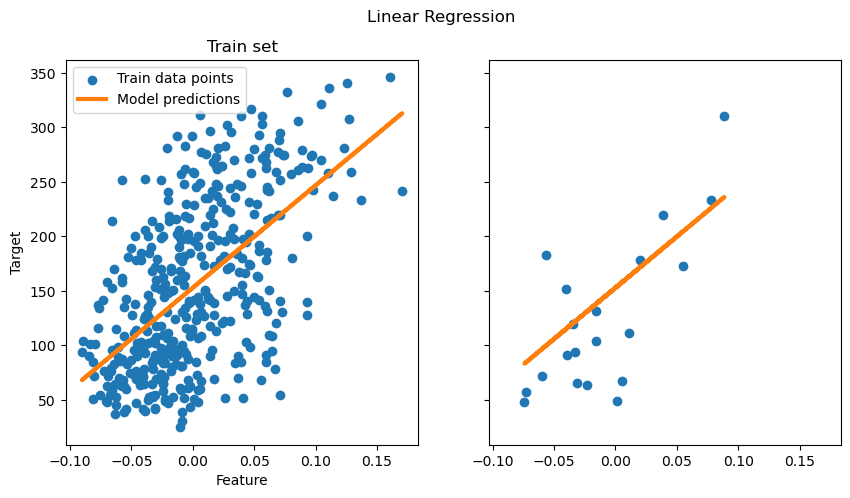

In [4]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
ax[0].scatter(X_train, y_train, label='Train data points')
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color='tab:orange',
    label='Model predictions',
)
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set')
ax[0].legend()

ax[1].scatter(X_test, y_test, label='Test data points')
ax[1].plot(X_test, y_pred, linewidth=3, color='tab:orange', label='Model prdictions')
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set')
ax[0].legend()

fig.suptitle('Linear Regression')

## 非负最小二乘
设置`positive=True`可限制w为正

# 岭回归
目标函数$\min_w||Xw-y||_2^2+\alpha||w||_2^2$


## 正则系数影响

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
# hilbert matrix
X=1/(np.arange(1, 11)+np.arange(0, 10)[:, np.newaxis])
y=np.ones(10)

In [2]:
n_alphas=200
alphas=np.logspace(-10, -2, n_alphas)
coefs=[]
for a in alphas:
    ridge=Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

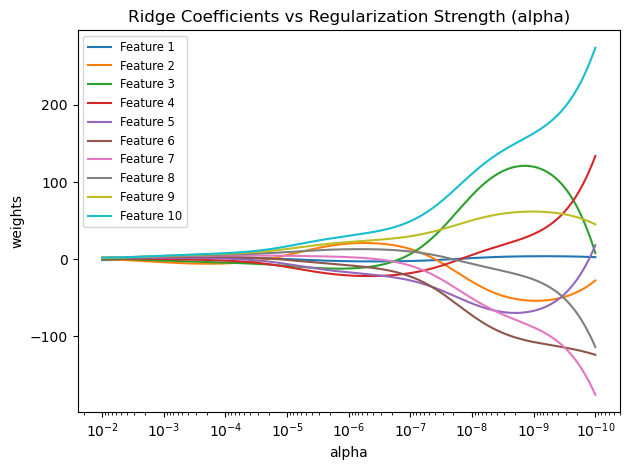

In [11]:
import matplotlib.pyplot as plt
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set(xscale='log', 
       xlabel='alpha', ylabel='weights', 
       title='Ridge Coefficients vs Regularization Strength (alpha)'
       )
ax.set_xlim(ax.get_xlim()[::-1])
plt.legend([f'Feature {i+1}' for i in range(X.shape[1])], 
           loc='best', fontsize='small')
plt.tight_layout()

## 分类
目标函数采用logistic or [hinge losses](https://en.wikipedia.org/wiki/Hinge_loss)\
在分类的class较多时速度比logistRegression快\
有时被称作具有线性核的最小二乘支持向量机

# ex:解释线性模型系数的常见陷阱

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

survey=fetch_openml(data_id=534, as_frame=True)
X=survey.data[survey.feature_names]
X.describe(include='all')

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [3]:
y=survey.target.values.ravel()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

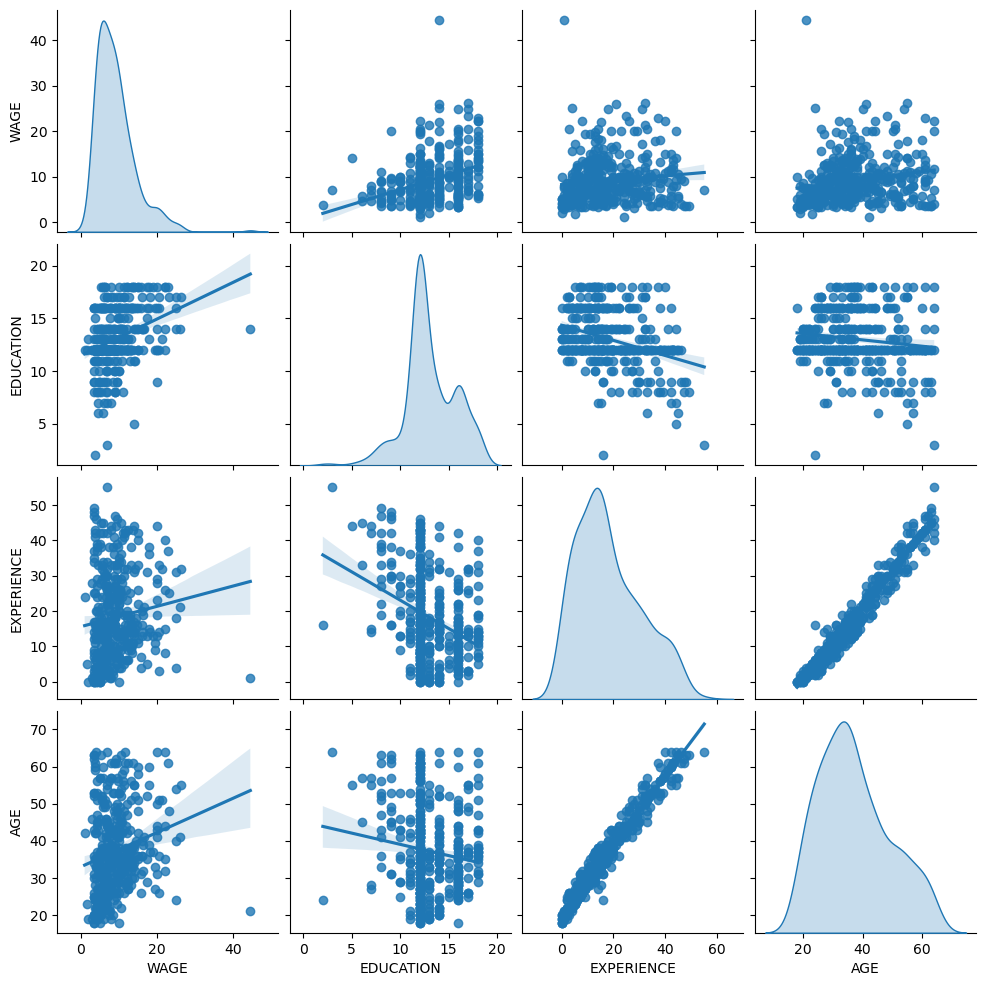

In [5]:
train_dataset=X_train.copy()
train_dataset.insert(0, 'WAGE', y_train)
sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.3 KB


In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]
preprocessor=make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

In [8]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model=make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), 
        func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [9]:
model.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [10]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error
mae_train=median_absolute_error(y_train, model.predict(X_train))
y_pred=model.predict(X_test)
mae_test=median_absolute_error(y_test, y_pred)
scores={
    "MedAE on training set": f"{mae_train:.2f}$/hour",
    "MedAE on testing  set": f"{mae_test:.2f}$/hour",
}

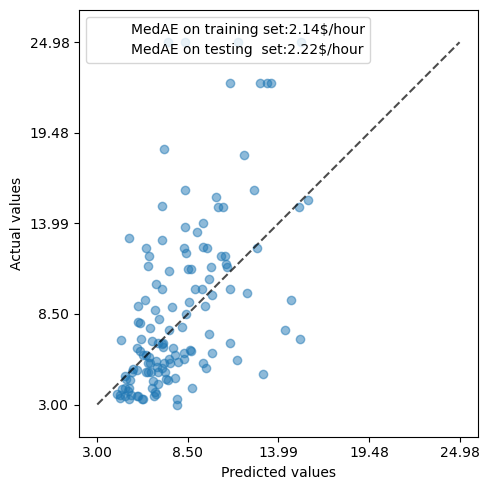

In [11]:
_,ax=plt.subplots(figsize=(5, 5))
display=PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind='actual_vs_predicted', ax=ax, scatter_kwargs={"alpha": .5}
)
for name, score in scores.items():
    ax.plot([], [], " ",label=f'{name}:{score}')
ax.legend(loc='upper left')
plt.tight_layout()


In [12]:
feature_names=model[:-1].get_feature_names_out()
coefs=pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

In [13]:
coefs

,Coefficients
RACE_Hispanic,-0.013614
RACE_Other,-0.009170
RACE_White,0.022499
OCCUPATION_Clerical,0.000271
OCCUPATION_Management,0.090754
OCCUPATION_Other,-0.024876
OCCUPATION_Professional,0.072190
OCCUPATION_Sales,-0.046410
OCCUPATION_Service,-0.090827
SECTOR_Construction,-0.000356


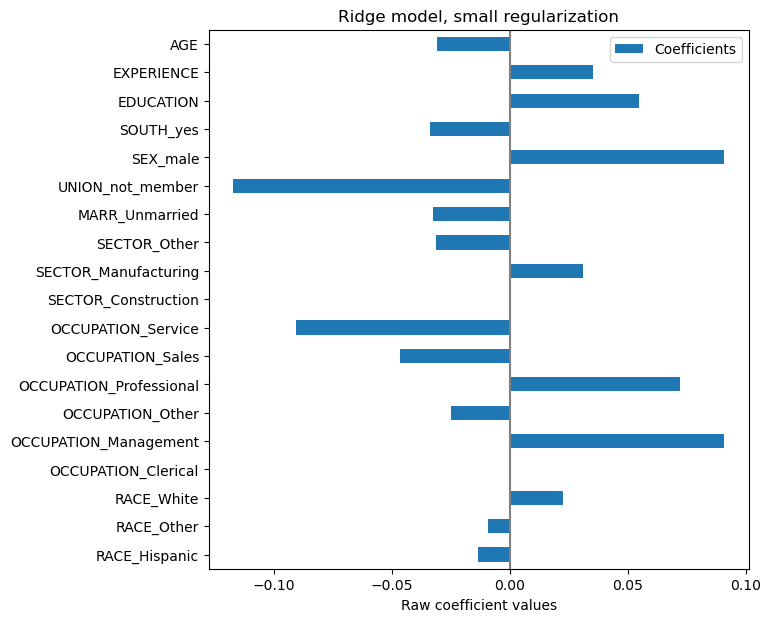

In [14]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

与常识较大出入，经验与年龄对工资影响较大

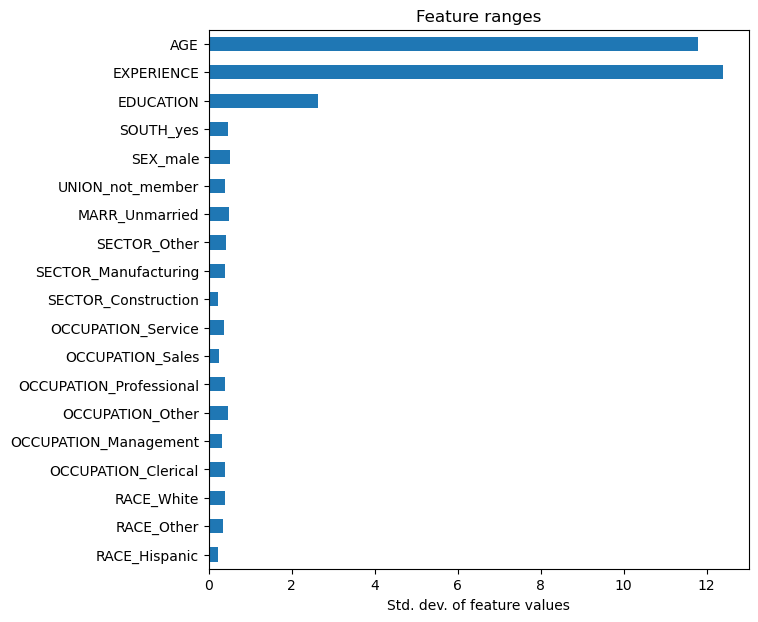

In [15]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train),
    columns=feature_names,
)
X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

特征间方差差异很大，std*coeffs作为影响因子

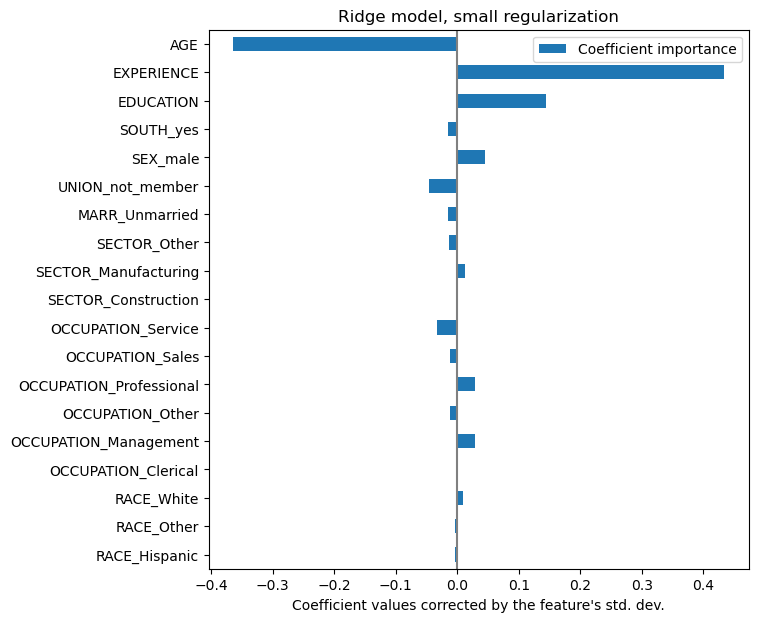

In [16]:
coefs=pd.DataFrame(
    model[-1].regressor_.coef_*X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

检验系数的变异性

In [17]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model=cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=-1,
)
coefs=pd.DataFrame(
    [
        est[-1].regressor_.coef_*est[:-1].transform(X.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model['estimator'], cv.split(X, y))
    ],
    columns=feature_names,
)

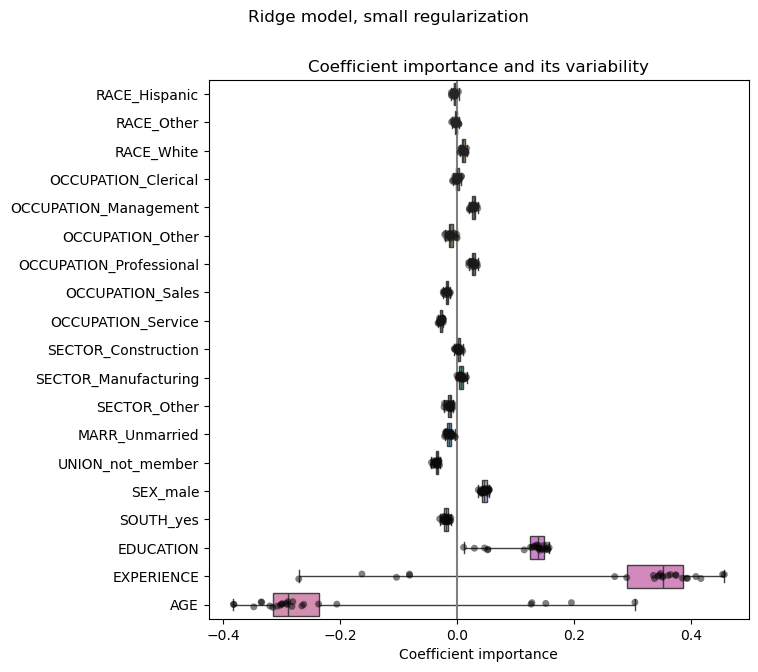

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient='h', palette='dark:k', alpha=.5)
# whis 箱线图的胡须
sns.boxplot(data=coefs, orient='h', saturation=.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

对于`AGE`和`EDUCTION`有很大的方差，可能存在共线性

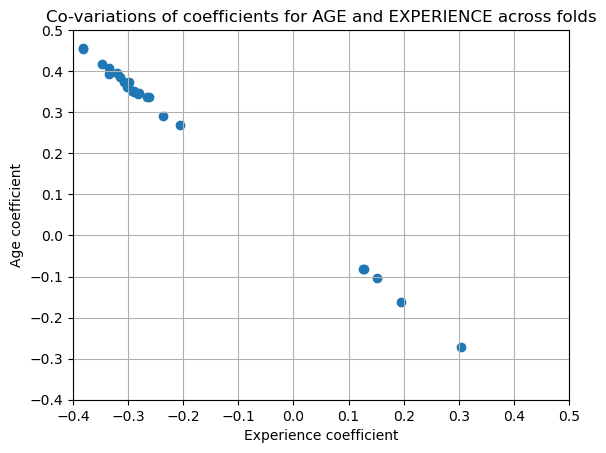

In [19]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

In [20]:
column_to_drop = ["AGE"]

cv_model = cross_validate(
    model,
    X.drop(columns=column_to_drop),
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        * est[:-1].transform(X.drop(columns=column_to_drop).iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names[:-1],
)

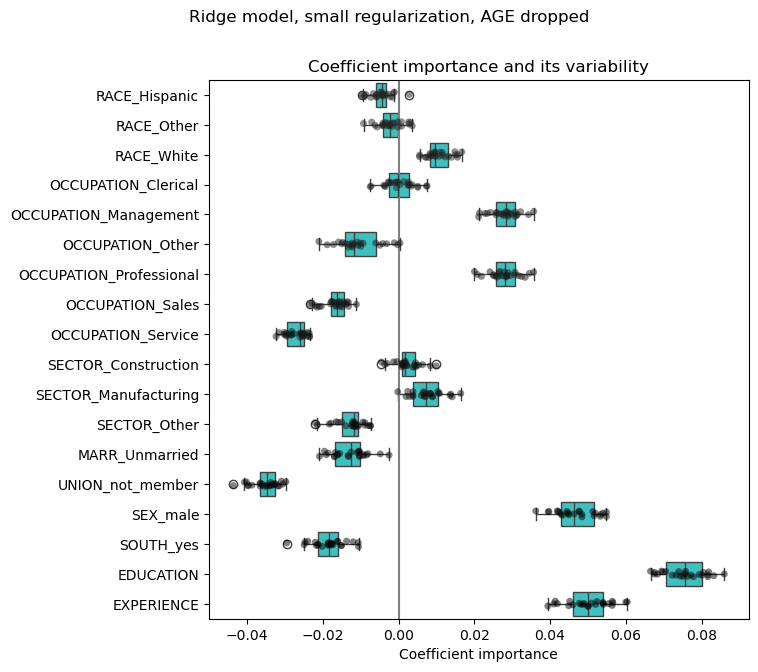

In [22]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.suptitle("Ridge model, small regularization, AGE dropped")
plt.subplots_adjust(left=0.3)

## 预处理数值变量

In [23]:
from sklearn.preprocessing import StandardScaler
preprocessor=make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    (StandardScaler(), numerical_columns),
)

In [24]:
model=make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)
model.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


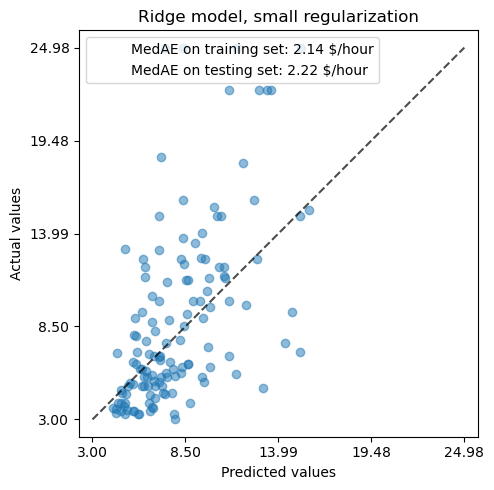

In [25]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

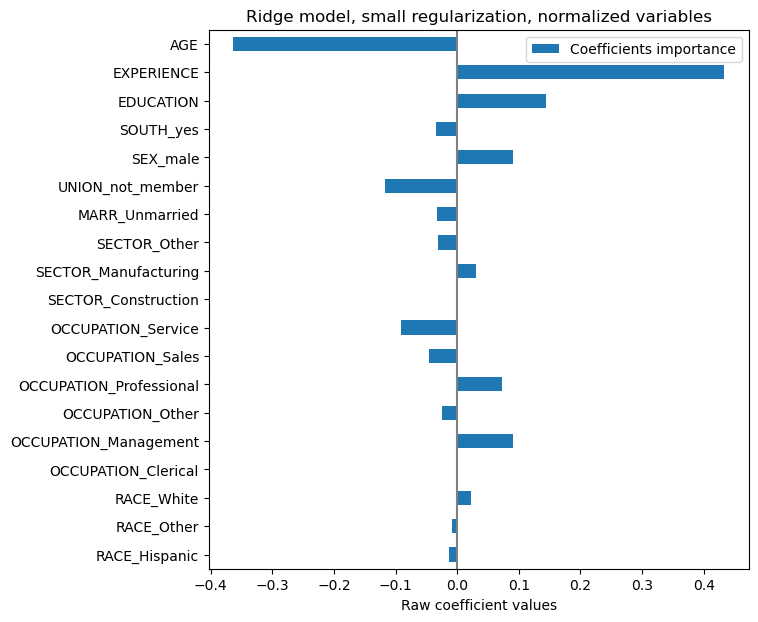

In [26]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [27]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

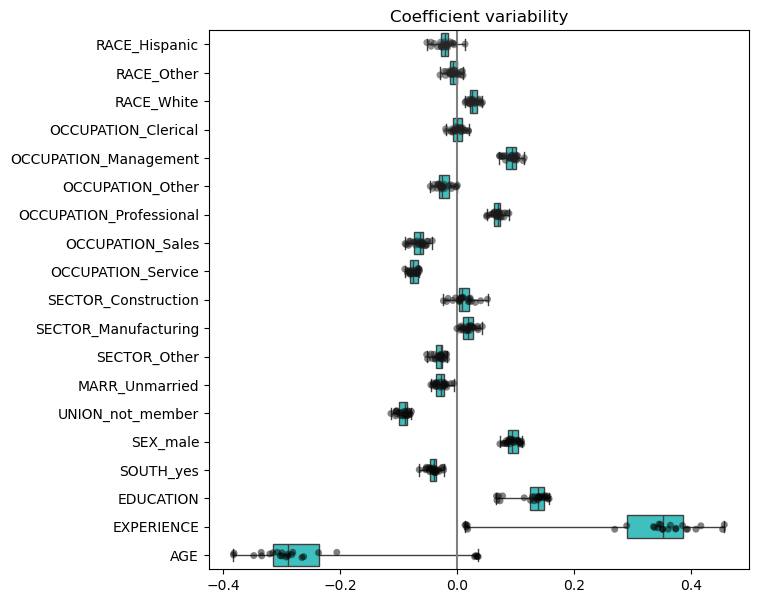

In [28]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## 正则化系数选择的线性模型

In [29]:
from sklearn.linear_model import RidgeCV

alphas=np.logspace(-10, 10, 21)
model=make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        RidgeCV(alphas=alphas),
        func=np.log10,
        inverse_func=sp.special.exp10,
    )
)
model.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
model[-1].regressor_.alpha_

np.float64(10.0)

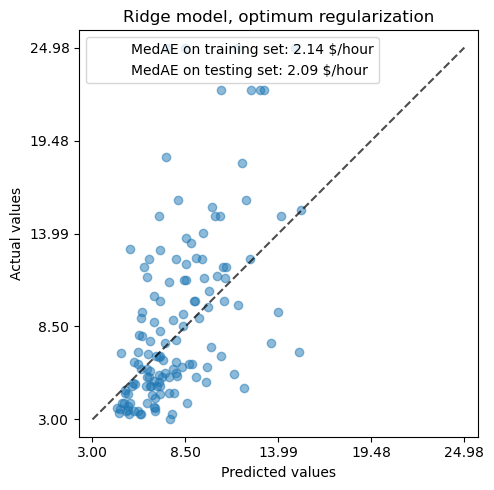

In [31]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, optimum regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

系数差异很大  AGE系数为正\
正则化减少相关变量的影响 权重在多个预测变量共享 单独变量权重较低


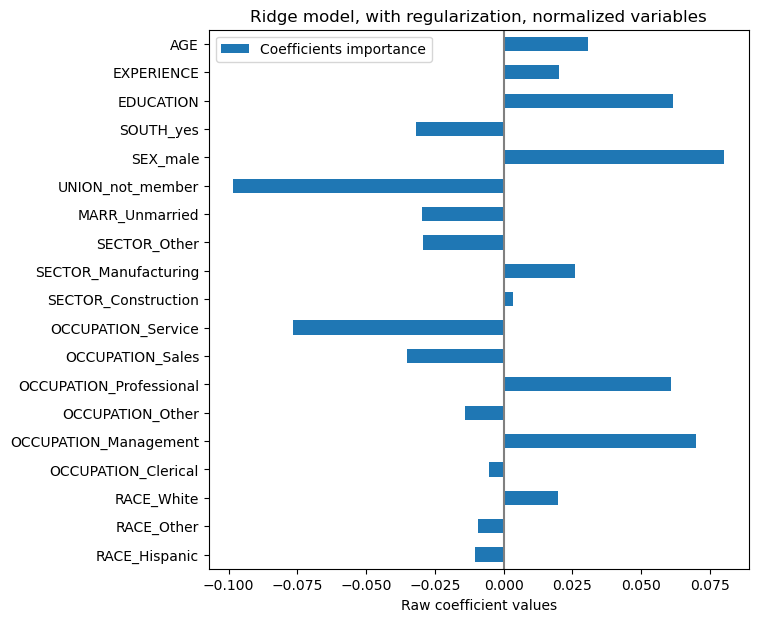

In [32]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, with regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [33]:
cv_model=cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=-1,
)
coefs=pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model['estimator']],
    columns=feature_names,
)

权重更加稳定

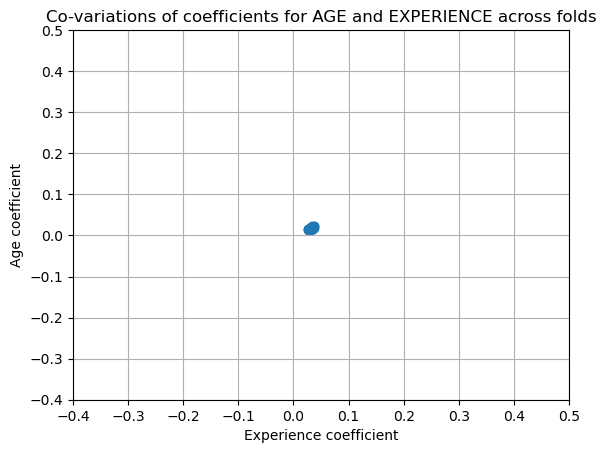

In [34]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

## 稀疏系数的线性模型

In [35]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=100_000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

In [36]:
model[-1].regressor_.alpha_

np.float64(0.001)

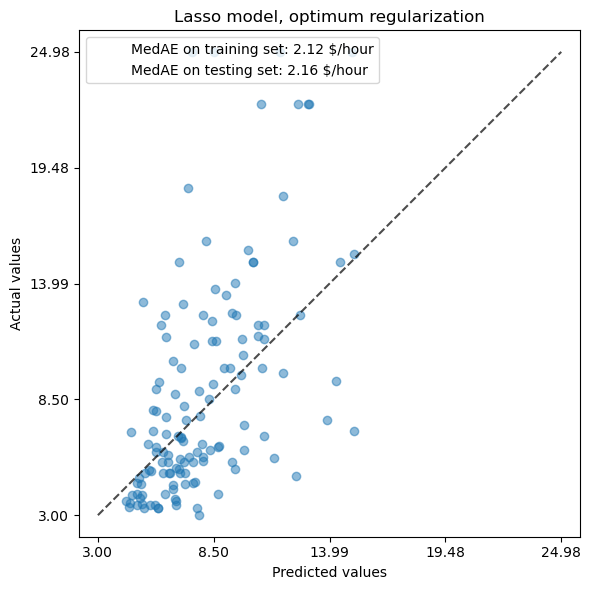

In [37]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(6, 6))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Lasso model, optimum regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()


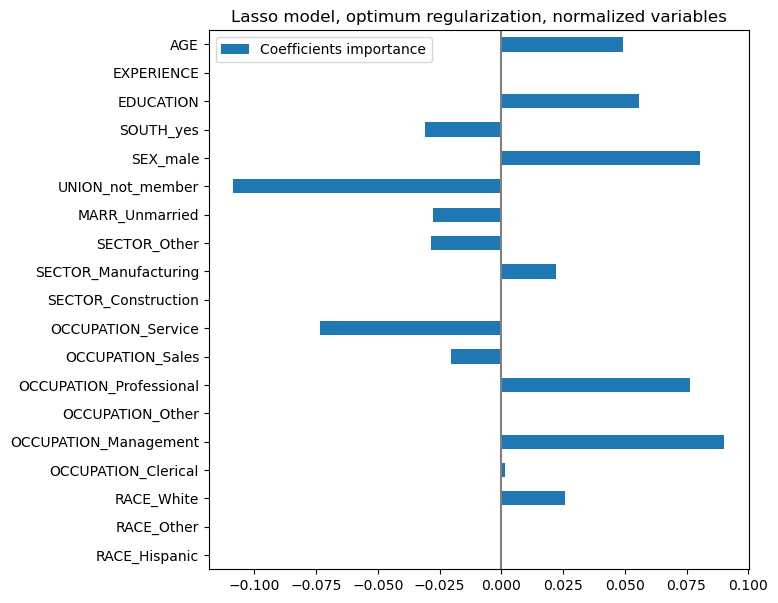

In [38]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, optimum regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

lasso删除可能存在共线性关系的特征，对于相关特征，模型不稳定

In [39]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

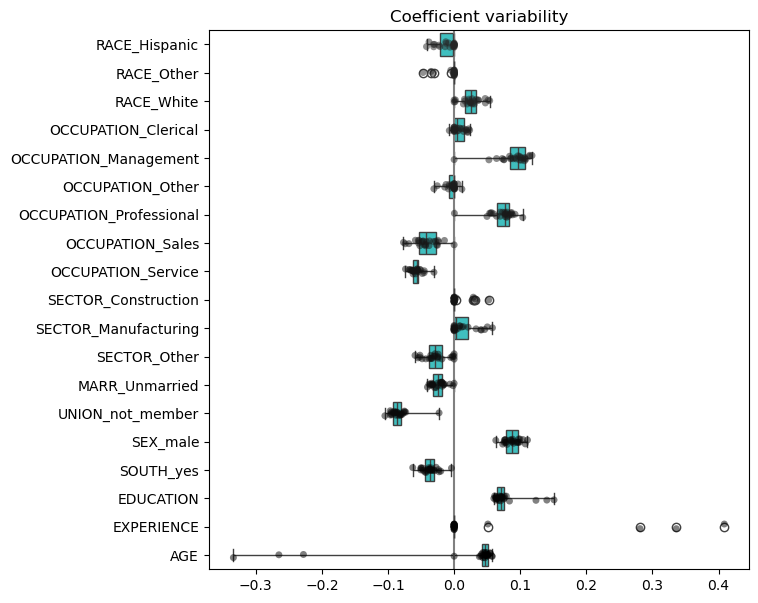

In [40]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=100)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## 总结
- 特征具有相同的度量单位才能比较系数「特征重要性」常使用标准缩放
- 交叉验证可检验模型的稳定性
- 相关特征导致线性模型的不稳定 影响难以解释